          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: sleep_score
No. Observations: 147     Method:             REML       
No. Groups:       5       Scale:              44.3091    
Min. group size:  26      Log-Likelihood:     -486.9398  
Max. group size:  33      Converged:          Yes        
Mean group size:  29.4                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      84.618    1.008 83.911 0.000 82.642 86.595
C(phase)[T.4]  -1.178    1.180 -0.998 0.318 -3.490  1.135
Group Var       2.824    0.467                           

    sleep_score  predicted_sleep_score
0            78              84.618340
1            94              84.618340
2            79              84.618340
3            63              84.618340
4            72              84.618340
5            80      

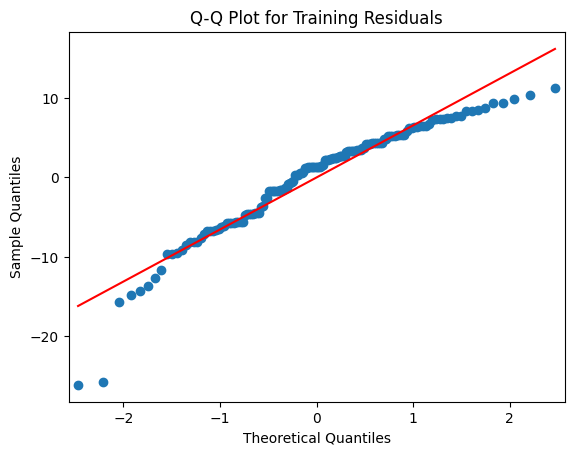

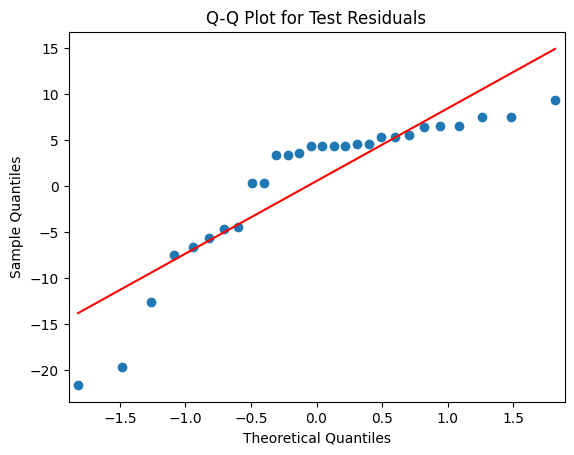

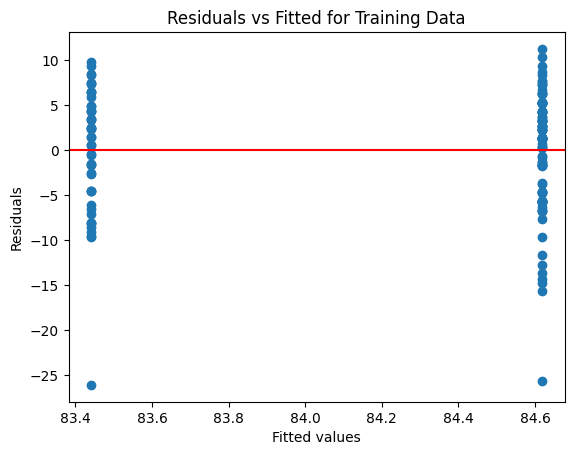

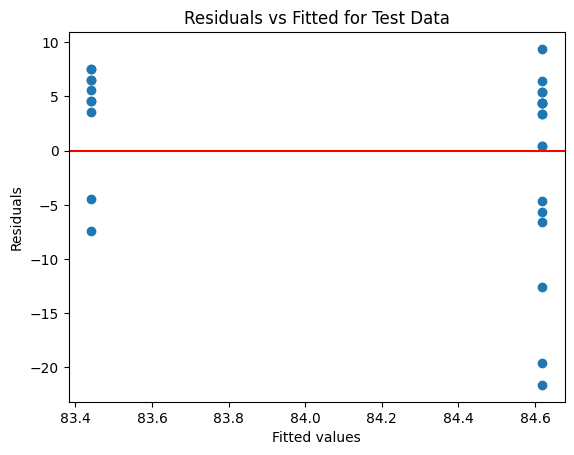

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load training data from CSV
train_file_path = 'Data_Option2.csv'
train_df = pd.read_csv(train_file_path)

# Fit a linear mixed-effects model
# The fixed effect is the menstrual phase, and the random effect is the cycle.
model = smf.mixedlm("sleep_score ~ C(phase)", train_df, groups=train_df["cycle"])
result = model.fit(method='cg', maxiter=1000)

print(result.summary())

# Load test data from CSV
test_file_path = '/test.csv'
test_df = pd.read_csv(test_file_path)

# Make predictions on the test data
test_df['predicted_sleep_score'] = result.predict(test_df)

# Display the test data with predictions
print(test_df[['sleep_score', 'predicted_sleep_score']])

# Predict on training and test sets
predicted_train = result.predict(train_df)
predicted_test = result.predict(test_df)

# Add predicted values to the respective DataFrames
train_df['predicted_sleep_score'] = predicted_train
test_df['predicted_sleep_score'] = predicted_test




# Remove rows with NaN values in the true or predicted labels for each dataset
train_df = train_df.dropna(subset=['sleep_score', 'predicted_sleep_score'])
test_df = test_df.dropna(subset=['sleep_score', 'predicted_sleep_score'])




#Now, compute the metrics
mse_train = mean_squared_error(train_df['sleep_score'], train_df['predicted_sleep_score'])
mse_test = mean_squared_error(test_df['sleep_score'], test_df['predicted_sleep_score'])

mae_train = mean_absolute_error(train_df['sleep_score'], train_df['predicted_sleep_score'])
mae_test = mean_absolute_error(test_df['sleep_score'], test_df['predicted_sleep_score'])

# Print results
print("\nTraining MSE:", mse_train)
print("Test MSE:", mse_test)

print("\nTraining MAE:", mae_train)
print("Test MAE:", mae_test)

# Q-Q plot for training results
sm.qqplot(result.resid, line='s')
plt.title('Q-Q Plot for Training Residuals')
plt.show()


# Q-Q plot for test results
test_residuals = test_df['sleep_score'] - test_df['predicted_sleep_score']
sm.qqplot(test_residuals, line='s')
plt.title('Q-Q Plot for Test Residuals')
plt.show()



# Residuals vs Fitted plot for training results
plt.scatter(train_df['predicted_sleep_score'], result.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Training Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs Fitted plot for test results
residuals_test = test_df['sleep_score'] - test_df['predicted_sleep_score']
plt.scatter(test_df['predicted_sleep_score'], residuals_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Test Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  sleep_score
No. Observations:   147      Method:              REML       
No. Groups:         5        Scale:               44.3573    
Min. group size:    26       Log-Likelihood:      -484.6441  
Max. group size:    33       Converged:           Yes        
Mean group size:    29.4                                     
-------------------------------------------------------------
               Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------
Intercept     -148.078  214.465 -0.690 0.490 -568.420 272.265
C(phase)[T.4]   -2.580    1.750 -1.474 0.140   -6.011   0.850
temperature      2.401    2.212  1.085 0.278   -1.936   6.737
Group Var        2.477    0.433                              

    sleep_score  predicted_sleep_score
0            78              84.679567
1            94              85.639786
2            79           

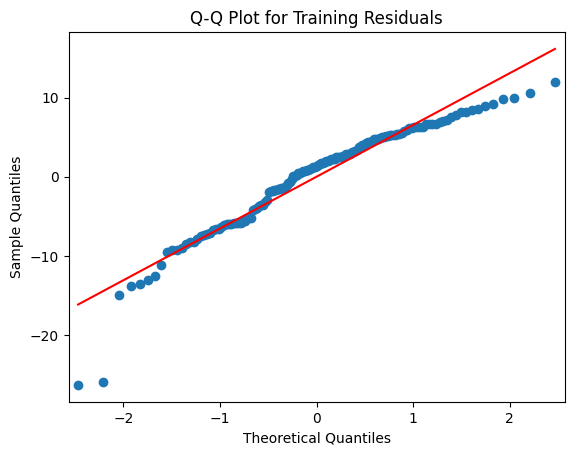

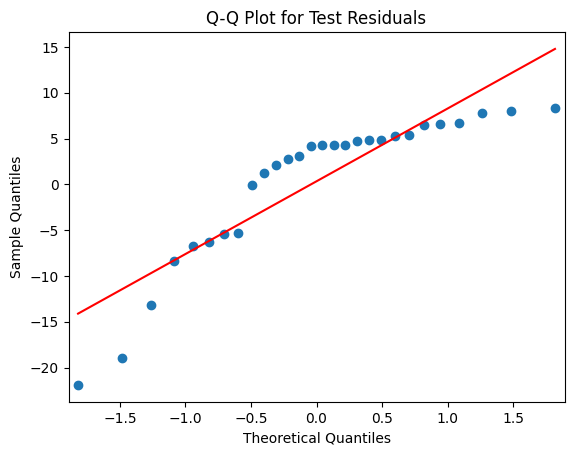

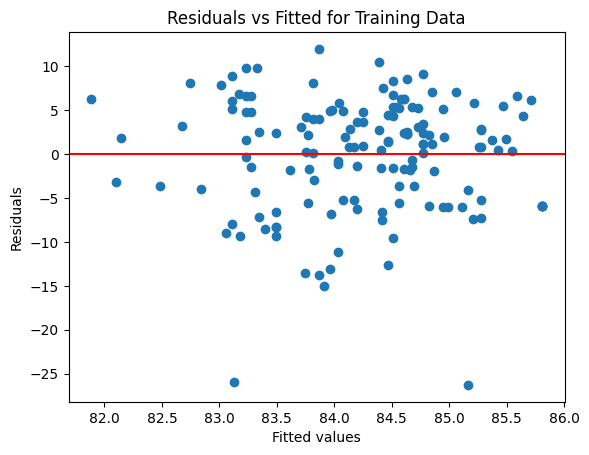

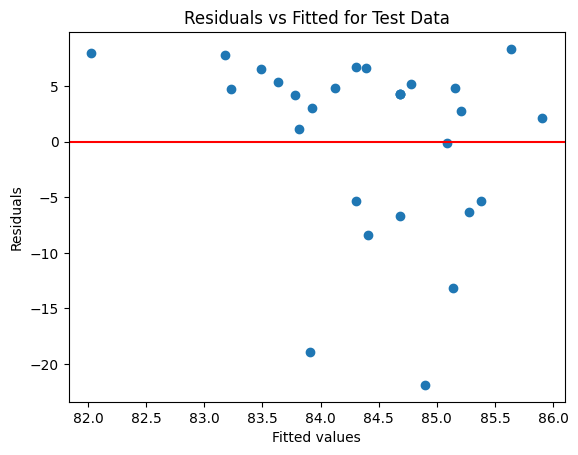

In [3]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load training data from CSV
train_file_path = '/Option2.csv'
train_df = pd.read_csv(train_file_path)

# Fit a linear mixed-effects model
# The fixed effect is the menstrual phase, and the random effect is the cycle.
model = smf.mixedlm("sleep_score ~ C(phase)+ temperature", train_df, groups=train_df["cycle"])
result = model.fit(method='cg', maxiter=1000)

print(result.summary())

# Load test data from CSV
test_file_path = '/test.csv'
test_df = pd.read_csv(test_file_path)

# Make predictions on the test data
test_df['predicted_sleep_score'] = result.predict(test_df)

# Display the test data with predictions
print(test_df[['sleep_score', 'predicted_sleep_score']])

# Predict on training and test sets
predicted_train = result.predict(train_df)
predicted_test = result.predict(test_df)

# Add predicted values to the respective DataFrames
train_df['predicted_sleep_score'] = predicted_train
test_df['predicted_sleep_score'] = predicted_test




# Remove rows with NaN values in the true or predicted labels for each dataset
train_df = train_df.dropna(subset=['sleep_score', 'predicted_sleep_score'])
test_df = test_df.dropna(subset=['sleep_score', 'predicted_sleep_score'])




#Now, compute the metrics
mse_train = mean_squared_error(train_df['sleep_score'], train_df['predicted_sleep_score'])
mse_test = mean_squared_error(test_df['sleep_score'], test_df['predicted_sleep_score'])

mae_train = mean_absolute_error(train_df['sleep_score'], train_df['predicted_sleep_score'])
mae_test = mean_absolute_error(test_df['sleep_score'], test_df['predicted_sleep_score'])

# Print results
print("\nTraining MSE:", mse_train)
print("Test MSE:", mse_test)

print("\nTraining MAE:", mae_train)
print("Test MAE:", mae_test)

# Q-Q plot for training results
sm.qqplot(result.resid, line='s')
plt.title('Q-Q Plot for Training Residuals')
plt.show()


# Q-Q plot for test results
test_residuals = test_df['sleep_score'] - test_df['predicted_sleep_score']
sm.qqplot(test_residuals, line='s')
plt.title('Q-Q Plot for Test Residuals')
plt.show()



# Residuals vs Fitted plot for training results
plt.scatter(train_df['predicted_sleep_score'], result.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Training Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs Fitted plot for test results
residuals_test = test_df['sleep_score'] - test_df['predicted_sleep_score']
plt.scatter(test_df['predicted_sleep_score'], residuals_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Test Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      sleep_score
No. Observations:       147          Method:                  REML       
No. Groups:             5            Scale:                   44.6759    
Min. group size:        26           Log-Likelihood:          -482.1873  
Max. group size:        33           Converged:               Yes        
Mean group size:        29.4                                             
-------------------------------------------------------------------------
                           Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------------------
Intercept                 -101.198  274.805 -0.368 0.713 -639.806 437.411
C(phase)[T.4]             -123.515  439.117 -0.281 0.778 -984.168 737.138
temperature                  1.917    2.835  0.676 0.499   -3.639   7.473
C(phase)[T.4]:temperature    1.243    4.513  0.275 0.783

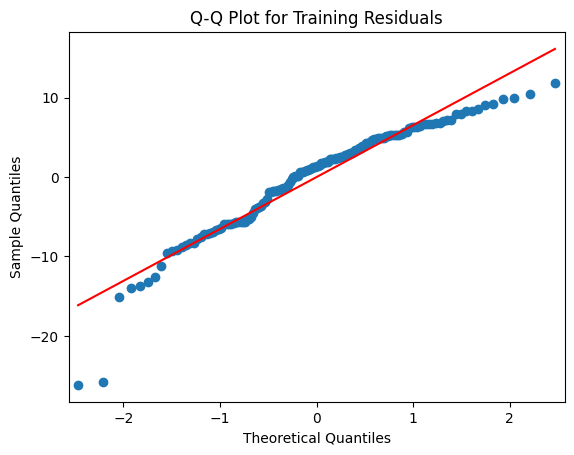

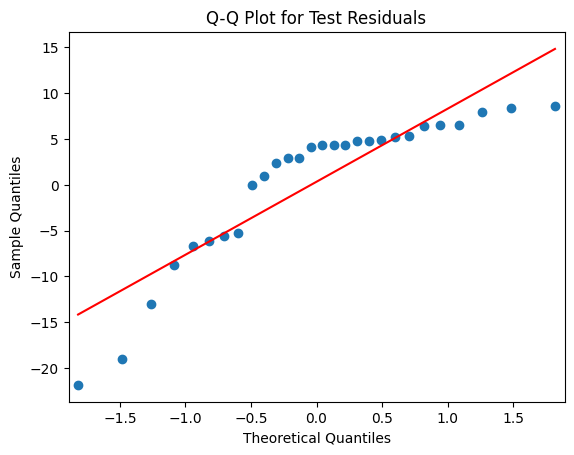

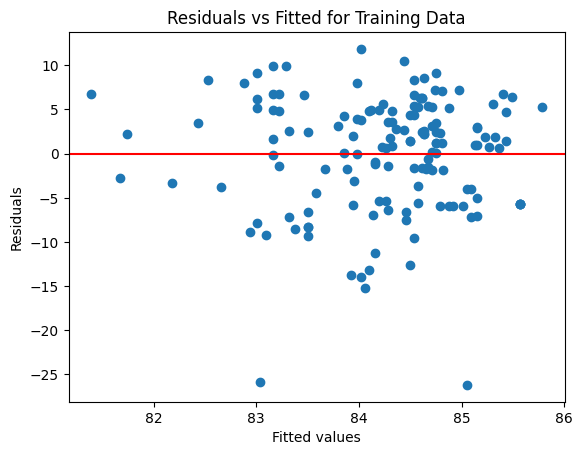

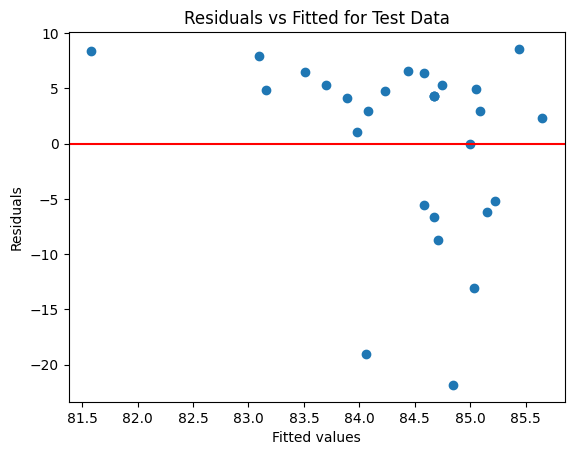

In [4]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load training data from CSV
train_file_path = '/Option2.csv'
train_df = pd.read_csv(train_file_path)

# Fit a linear mixed-effects model
# The fixed effect is the menstrual phase, and the random effect is the cycle.
model = smf.mixedlm("sleep_score ~ C(phase)*temperature", train_df, groups=train_df["cycle"])
result = model.fit(method='cg', maxiter=1000)

print(result.summary())

# Load test data from CSV
test_file_path = '/test.csv'
test_df = pd.read_csv(test_file_path)

# Make predictions on the test data
test_df['predicted_sleep_score'] = result.predict(test_df)

# Display the test data with predictions
print(test_df[['sleep_score', 'predicted_sleep_score']])

# Predict on training and test sets
predicted_train = result.predict(train_df)
predicted_test = result.predict(test_df)

# Add predicted values to the respective DataFrames
train_df['predicted_sleep_score'] = predicted_train
test_df['predicted_sleep_score'] = predicted_test




# Remove rows with NaN values in the true or predicted labels for each dataset
train_df = train_df.dropna(subset=['sleep_score', 'predicted_sleep_score'])
test_df = test_df.dropna(subset=['sleep_score', 'predicted_sleep_score'])




#Now, compute the metrics
mse_train = mean_squared_error(train_df['sleep_score'], train_df['predicted_sleep_score'])
mse_test = mean_squared_error(test_df['sleep_score'], test_df['predicted_sleep_score'])

mae_train = mean_absolute_error(train_df['sleep_score'], train_df['predicted_sleep_score'])
mae_test = mean_absolute_error(test_df['sleep_score'], test_df['predicted_sleep_score'])

# Print results
print("\nTraining MSE:", mse_train)
print("Test MSE:", mse_test)

print("\nTraining MAE:", mae_train)
print("Test MAE:", mae_test)

# Q-Q plot for training results
sm.qqplot(result.resid, line='s')
plt.title('Q-Q Plot for Training Residuals')
plt.show()


# Q-Q plot for test results
test_residuals = test_df['sleep_score'] - test_df['predicted_sleep_score']
sm.qqplot(test_residuals, line='s')
plt.title('Q-Q Plot for Test Residuals')
plt.show()



# Residuals vs Fitted plot for training results
plt.scatter(train_df['predicted_sleep_score'], result.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Training Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs Fitted plot for test results
residuals_test = test_df['sleep_score'] - test_df['predicted_sleep_score']
plt.scatter(test_df['predicted_sleep_score'], residuals_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted for Test Data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
